# Worksheet 17

Name: Pranesh Jayasundar
UID: U08334002

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

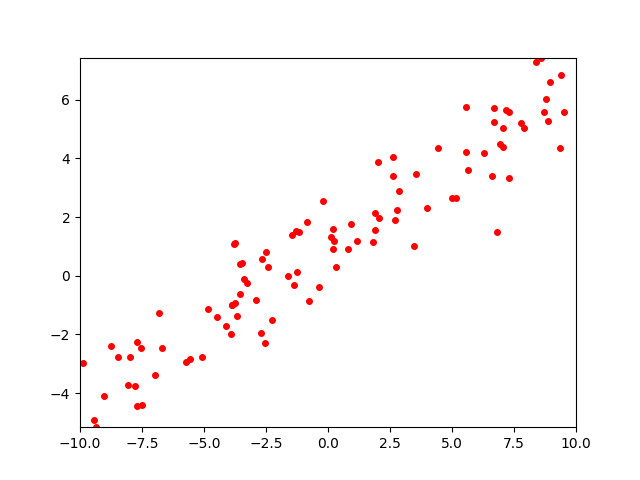

In [1]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

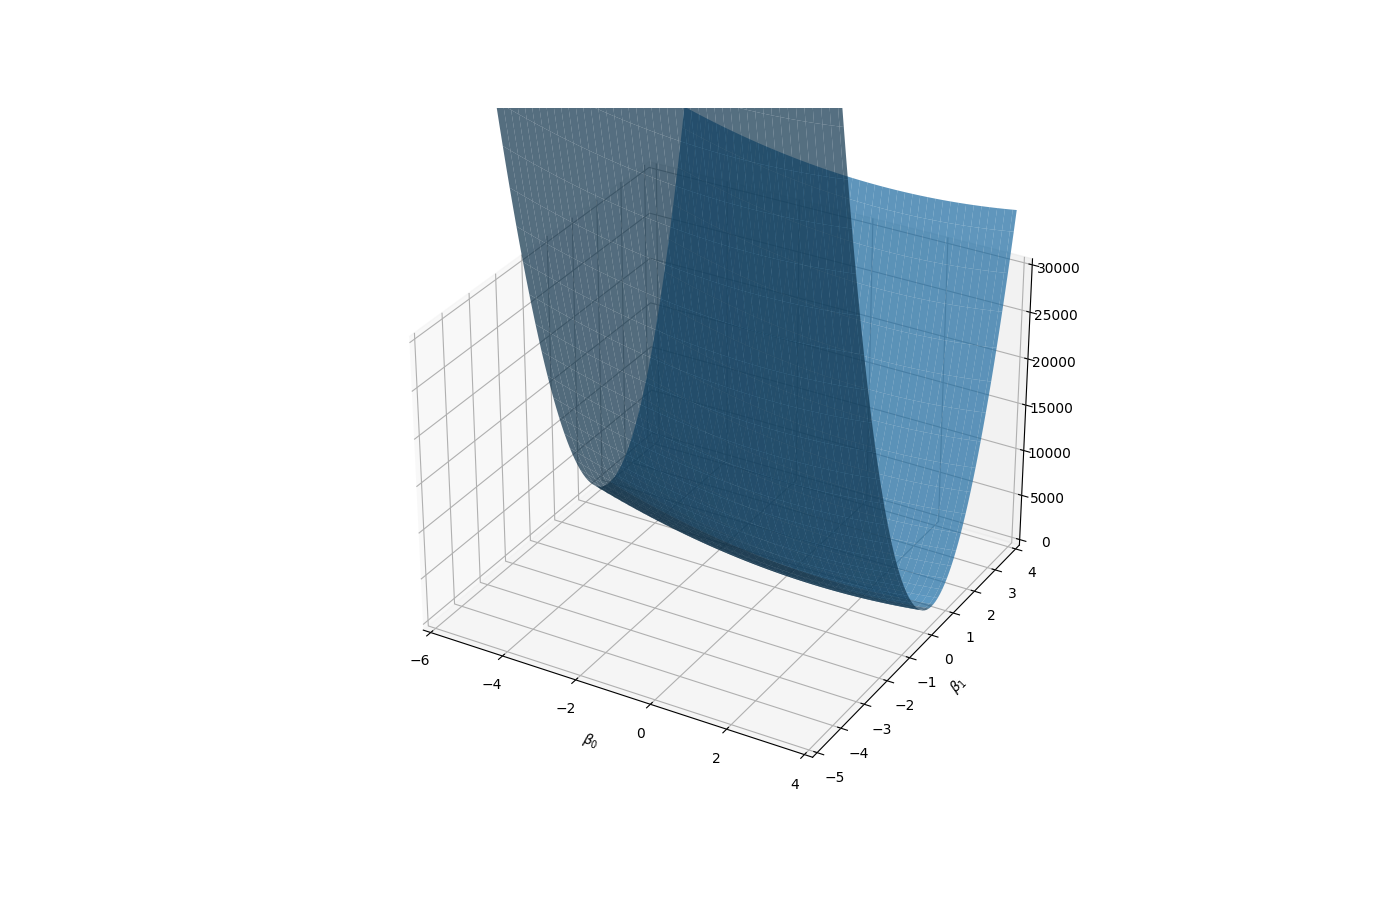

In [2]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    return np.linalg.norm(y-np.dot(X, beta))**2

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [3]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    first = 2 * np.dot(X.T, np.dot(X, beta))
    second = 2 * np.dot(X.T, y)
    return first - second


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 20, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [4]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1]*xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
    )

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

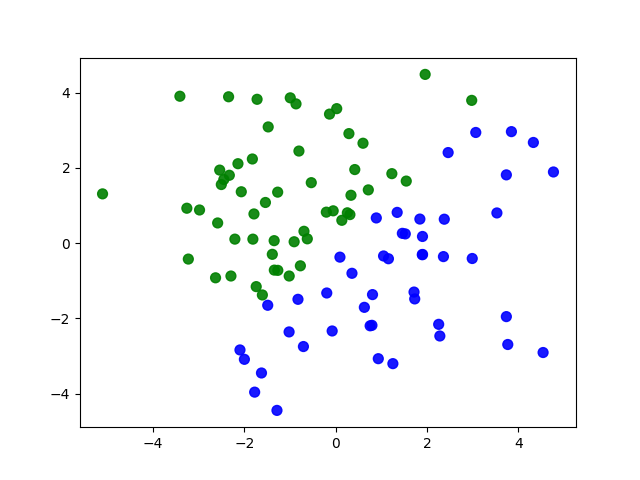

In [5]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

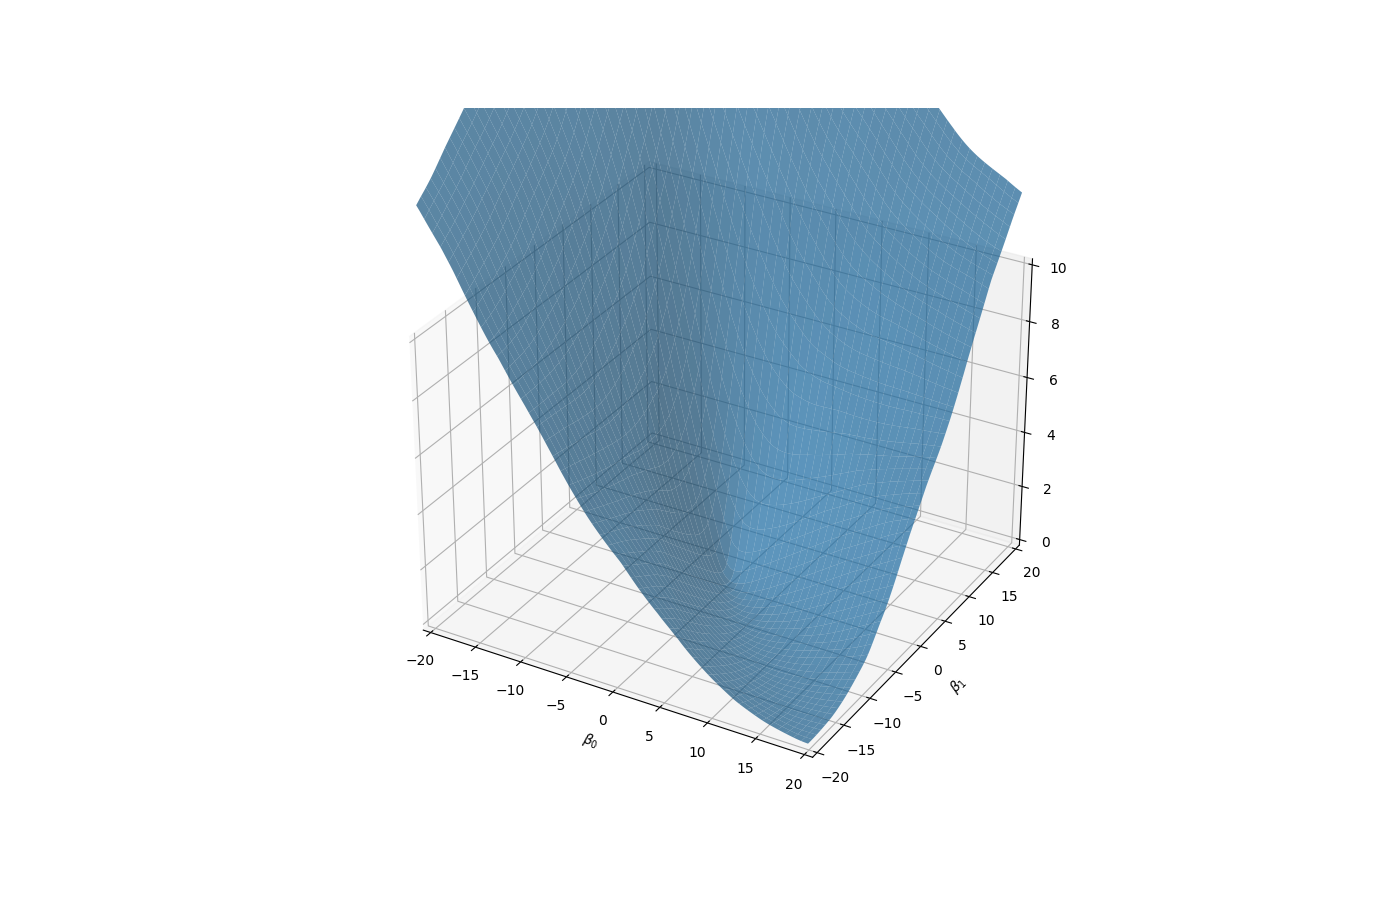

In [6]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def loss(X, y, beta):
    n = len(X)
    y_hat = sigmoid(X.dot(beta))
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)
    loss = -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss / n


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

[ 6.40853366  6.61145445  6.81675655  7.02440321  7.23435771  7.44659033
  7.66107953  7.8778123   8.096779    8.31795753  8.54132111  8.76682044
  8.99167276  9.21508424  9.44044207  9.66652116  9.88161873 10.09785111
 10.31503779 10.53302072 10.75166753]


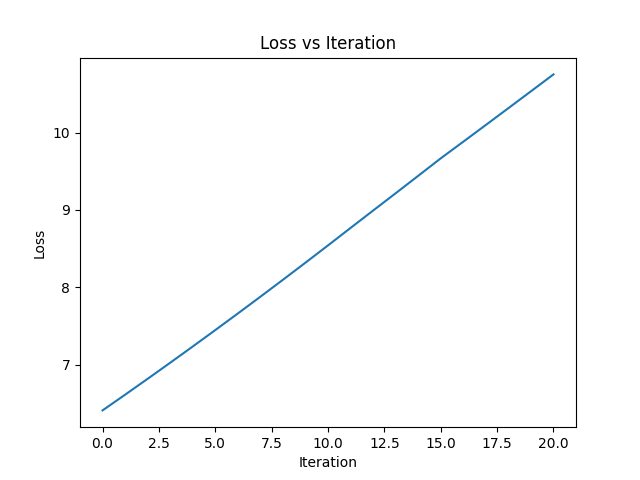

In [7]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def gradient(X, y, beta):
    N = len(X)
    sigma = sigmoid(np.dot(X, beta))
    grad = 1/N * X.T @ (y - sigma)
    return grad

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses) # Return the betas and losses

beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 20, images)

print(losses)

# Create a new figure
fig = plt.figure()

# Plot the losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.show()

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

f) Create an animation of the logistic regression fit at every epoch.

## Please refer gd_logit.gif for the animation.

In [9]:
# from IPython.display import Image
# Image(filename="gd_logit.gif")

g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.


Epoch: 0, Indices: [72  0 22 55 61  4 70 91 57 14 53  7 27 33 18 12  2 90 23 35]
Epoch: 1, Indices: [50 11 99 75 95  6 34 60 80 84 87 56 70 18 20 73 91 35 19 71]
Epoch: 2, Indices: [96  2 75 19 24 70 27 79 18 68 36 42 39 52 15 30 47 57 26 85]
Epoch: 3, Indices: [84 58 72 66  9  4 54 21 61 92 95 98 53  2 35 50 64 49  0 88]
Epoch: 4, Indices: [ 8 57 70 88 38 39 92 13  7 14 44 81 67 80 60 20 28  5 24  1]
Epoch: 5, Indices: [18 72 61 43  0 20 60 15 52 10 40  3 70 51 34 12 71 27 24 38]
Epoch: 6, Indices: [74 99 22 35 60 89 31 68 94 36 76 50 46 72 62 66  6  9 58 56]
Epoch: 7, Indices: [43 75 62 84 21 57 69 77 48 90 47 91 96 80 31 55 95 86 79 54]
Epoch: 8, Indices: [39 35 93 57 76 81 18 74 40  5 51 54  0 22 32 31 96 26 83 80]
Epoch: 9, Indices: [12 66 85 37 38 13 44 87  4  1 52 34 75 14 67 24 40 15 17 63]
Epoch: 10, Indices: [92 22 21 59 63 56 58  5 71 51 26 43 33 72  2 94 48 83 70 98]
Epoch: 11, Indices: [58 19 57 17 12 96 75 14 27  9 48 60 82 74 76 37 53 13 35 61]
Epoch: 12, Indices: [40 7

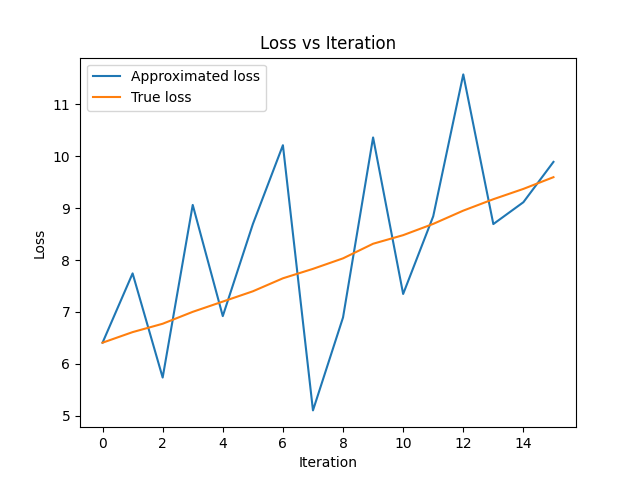

In [8]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses, true_losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], true_losses, 'o-', c='g', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def gradient(X, y, beta):
    N = len(X)
    sigma = sigmoid(np.dot(X, beta))
    grad = 1/N * X.T @ (y - sigma)
    return grad

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images, batch_size):
    losses = [loss(X, y, beta_hat)]
    true_losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]
    N = len(X)

    for _ in range(epochs):
        images.append(snap(betas, losses, true_losses))
        batch_indices = np.random.choice(range(N), batch_size, replace=False)

        print('Epoch: '+str(_)+', Indices: '+str(batch_indices))
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = gradient(X_batch, y_batch, beta_hat)
        beta_hat = beta_hat - learning_rate * grad

        losses.append(loss(X_batch, y_batch, beta_hat))
        true_losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses), np.array(true_losses) # Return the betas, losses, and true_losses

print()
beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
batch_size = 20 # Batch size is defined as 20
# Epoch size size between 10 to 20
betas, losses, true_losses = gradient_descent(X, y, beta_start, learning_rate, 15, images, batch_size)

print('Losses: ' +str(losses))
print('True Losses: '+ str(true_losses))

# Create a new figure
fig = plt.figure()

# Plot the losses
plt.plot(range(len(losses)), losses, label='Approximated loss')
plt.plot(range(len(true_losses)), true_losses, label='True loss')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.legend()
plt.show()

images[0].save(
    'gd_logit_random_batch.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


In [74]:
# from IPython.display import Image
# Image(filename="gd_logit_random_batch.gif")